In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Creat a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-89.9894414647538 -39.67736515111534
47.77387277447579 124.31419166971187
-87.96437195477831 -146.26696242808617
-6.913737854390433 114.39501382964403
-59.92314335722541 -63.602366430593264
-45.43189163254878 -105.20824978450523
-50.031382328810636 -11.464016175890038
50.77802024214125 -62.64786010912266
47.35834994614632 -80.85816677069056
14.803280977255895 174.9391813663729
78.3123886366244 -24.610858107658714
-15.750681864005458 -131.55952292314936
-46.09728318700224 -10.539650872261461
-54.37758096149333 105.27153861121889
51.66871677269842 -161.56436247075925
64.98363480810221 -54.48635716215996
-20.529607668815856 98.21835984897484
8.6582752470039 55.96363296956994
-53.62274252287977 -118.60730321462322
85.9742477495364 -46.750731875453624
54.699088321125885 87.26918188121516
-53.970182364561445 -105.80791847569694
-34.80375802515089 18.480793475495915
-78.4725012548343 168.52990058478395
-48.890169555953065 -14.89178136048119
-82.64964180875795 174.89540298945104
56.28394410338

In [5]:
# Import citipy
from citipy import citipy

In [6]:
# create a list for holding the cities.
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it tot he cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
#import requests and weather api
import requests
from config import weather_api_key
import time
from datetime import datetime

In [8]:
#build the url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print('Beginning Data Retrieval    ')
print('----------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an ApI for each of the cities.
    try:
        #Parse the Json and retrieve data
        city_weather = requests.get(city_url).json()
        
        #Pase out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard time.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced skip the city.
    except:
        print("City not found. Skipping...")
        pass
#    except Exception as e: (use to help idenify real error)
#        print(e)
# Indicate that Data Loading is complete.
print("-------------------------")
print("Data Retrieval Complete  ")
print("-------------------------")


Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | fuyu
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | kalianget
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | havre-saint-pierre
Processing Record 8 of Set 1 | capreol
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | maniitsoq
Processing Record 16 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 17 of Set 1 | bandarbeyla
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | zelenogorskiy
Processing Record 20 of Set 1 | somerset west
Processing Record 21 of Set 1 | bluff
Proce

Processing Record 35 of Set 4 | iqaluit
Processing Record 36 of Set 4 | camacha
Processing Record 37 of Set 4 | geraldton
Processing Record 38 of Set 4 | kozhva
Processing Record 39 of Set 4 | walvis bay
Processing Record 40 of Set 4 | katsuura
Processing Record 41 of Set 4 | aleksandrov gay
Processing Record 42 of Set 4 | bredasdorp
Processing Record 43 of Set 4 | juba
Processing Record 44 of Set 4 | maracaibo
Processing Record 45 of Set 4 | mar del plata
Processing Record 46 of Set 4 | rangpo
Processing Record 47 of Set 4 | holland
Processing Record 48 of Set 4 | jardim
Processing Record 49 of Set 4 | camalu
Processing Record 50 of Set 4 | seinajoki
Processing Record 1 of Set 5 | galesong
Processing Record 2 of Set 5 | norman wells
Processing Record 3 of Set 5 | xapuri
Processing Record 4 of Set 5 | san patricio
Processing Record 5 of Set 5 | carnarvon
Processing Record 6 of Set 5 | mayenne
Processing Record 7 of Set 5 | torbay
Processing Record 8 of Set 5 | leshukonskoye
Processing 

City not found. Skipping...
Processing Record 26 of Set 8 | tomigusuku
Processing Record 27 of Set 8 | biltine
Processing Record 28 of Set 8 | ilulissat
Processing Record 29 of Set 8 | rani
Processing Record 30 of Set 8 | canutama
Processing Record 31 of Set 8 | le vauclin
Processing Record 32 of Set 8 | canitas
City not found. Skipping...
Processing Record 33 of Set 8 | tibacuy
Processing Record 34 of Set 8 | corner brook
Processing Record 35 of Set 8 | aksarka
Processing Record 36 of Set 8 | fort nelson
Processing Record 37 of Set 8 | gizo
Processing Record 38 of Set 8 | kushima
Processing Record 39 of Set 8 | potiskum
Processing Record 40 of Set 8 | seymchan
Processing Record 41 of Set 8 | naron
Processing Record 42 of Set 8 | athmallik
Processing Record 43 of Set 8 | rosetta
Processing Record 44 of Set 8 | riyadh
Processing Record 45 of Set 8 | ixcaquixtla
City not found. Skipping...
Processing Record 46 of Set 8 | sorvag
City not found. Skipping...
Processing Record 47 of Set 8 | 

Processing Record 13 of Set 12 | avera
Processing Record 14 of Set 12 | sakhon nakhon
Processing Record 15 of Set 12 | mumford
Processing Record 16 of Set 12 | achit
Processing Record 17 of Set 12 | urucara
Processing Record 18 of Set 12 | rock sound
Processing Record 19 of Set 12 | sao jose dos pinhais
Processing Record 20 of Set 12 | mergui
City not found. Skipping...
Processing Record 21 of Set 12 | camrose
Processing Record 22 of Set 12 | hasaki
Processing Record 23 of Set 12 | maningrida
Processing Record 24 of Set 12 | blackwater
Processing Record 25 of Set 12 | havelock
Processing Record 26 of Set 12 | pajapan
Processing Record 27 of Set 12 | blagoyevo
Processing Record 28 of Set 12 | daru
Processing Record 29 of Set 12 | college
Processing Record 30 of Set 12 | san jose
Processing Record 31 of Set 12 | calvinia
Processing Record 32 of Set 12 | ust-uda
Processing Record 33 of Set 12 | wewak
Processing Record 34 of Set 12 | rivera
Processing Record 35 of Set 12 | misratah
Process

In [10]:
# Convert the array of dictionaries to a Pandas DatFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,53.22,66,75,34.52,AR,2022-11-25 14:41:31
1,Fuyu,45.1833,124.8167,23.22,87,100,11.05,CN,2022-11-25 14:43:00
2,Mataura,-46.1927,168.8643,42.53,99,83,4.07,NZ,2022-11-25 14:43:00
3,Kalianget,-7.0500,113.9333,80.17,79,100,2.24,ID,2022-11-25 14:43:01
4,Castro,-24.7911,-50.0119,72.32,54,43,5.37,BR,2022-11-25 14:40:54
5,Cape Town,-33.9258,18.4232,70.11,51,0,29.93,ZA,2022-11-25 14:39:13
6,Havre-Saint-Pierre,50.2334,-63.5986,17.60,85,100,5.75,CA,2022-11-25 14:43:02
7,Capreol,46.7060,-80.9225,36.55,86,100,9.22,CA,2022-11-25 14:43:04
8,Butaritari,3.0707,172.7902,80.17,78,87,10.31,KI,2022-11-25 14:43:05
9,Rikitea,-23.1203,-134.9692,72.50,76,98,5.06,PF,2022-11-25 14:43:06


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-11-25 14:41:31,-54.8000,-68.3000,53.22,66,75,34.52
1,Fuyu,CN,2022-11-25 14:43:00,45.1833,124.8167,23.22,87,100,11.05
2,Mataura,NZ,2022-11-25 14:43:00,-46.1927,168.8643,42.53,99,83,4.07
3,Kalianget,ID,2022-11-25 14:43:01,-7.0500,113.9333,80.17,79,100,2.24
4,Castro,BR,2022-11-25 14:40:54,-24.7911,-50.0119,72.32,54,43,5.37
5,Cape Town,ZA,2022-11-25 14:39:13,-33.9258,18.4232,70.11,51,0,29.93
6,Havre-Saint-Pierre,CA,2022-11-25 14:43:02,50.2334,-63.5986,17.60,85,100,5.75
7,Capreol,CA,2022-11-25 14:43:04,46.7060,-80.9225,36.55,86,100,9.22
8,Butaritari,KI,2022-11-25 14:43:05,3.0707,172.7902,80.17,78,87,10.31
9,Rikitea,PF,2022-11-25 14:43:06,-23.1203,-134.9692,72.50,76,98,5.06


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the Dataframe for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

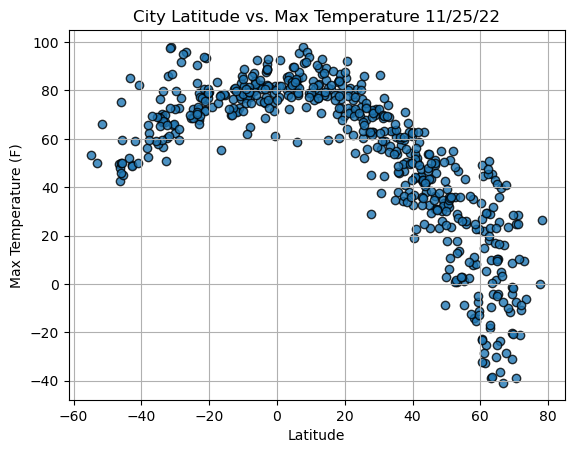

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

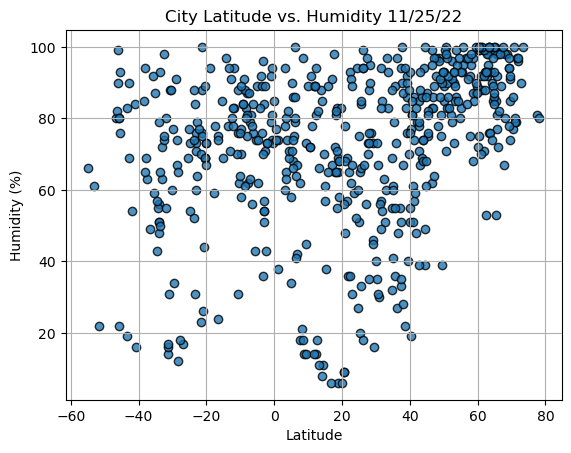

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

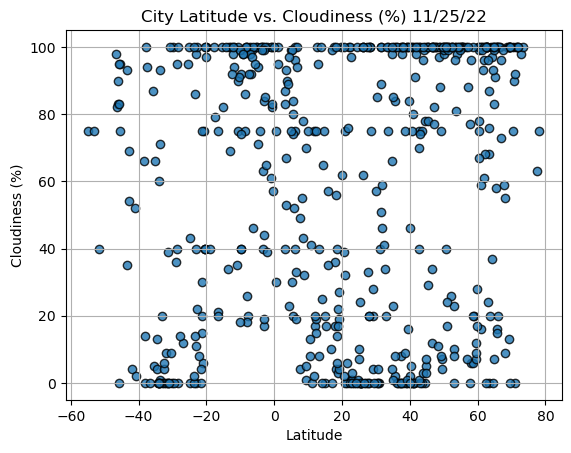

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

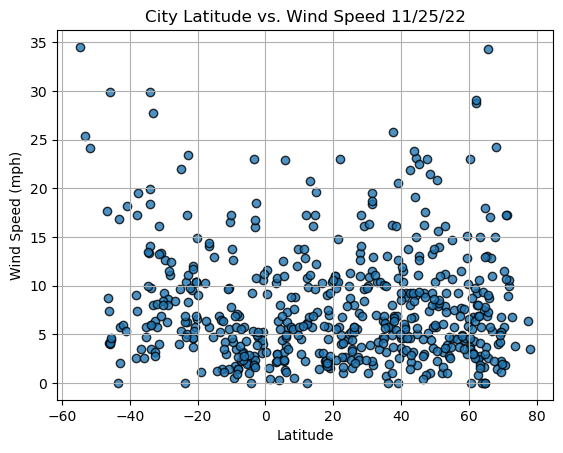

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()